In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) )
print( x+y )

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


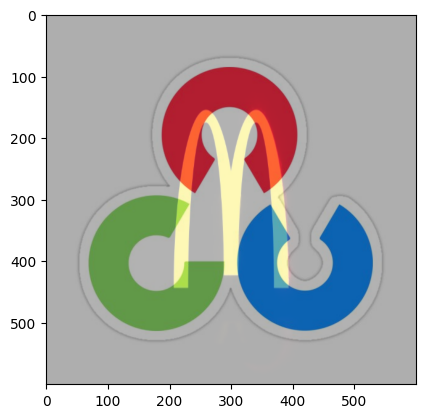

In [4]:
img1 = cv.imread('../../img/logo.jpg')
img2 = cv.imread('../../img/logo2.jpg')
img2 = cv.resize(img2, (img1.shape[0], img1.shape[1]))

dst = cv.addWeighted(img1,0.7,img2,0.3,0)
 
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGBA))

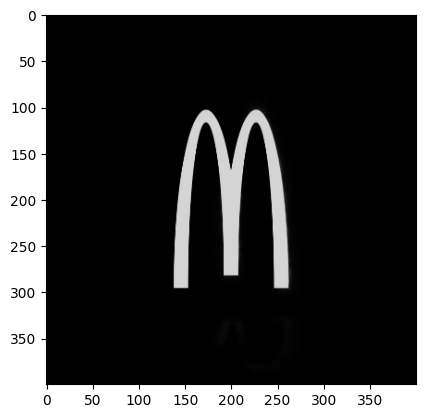

MASK


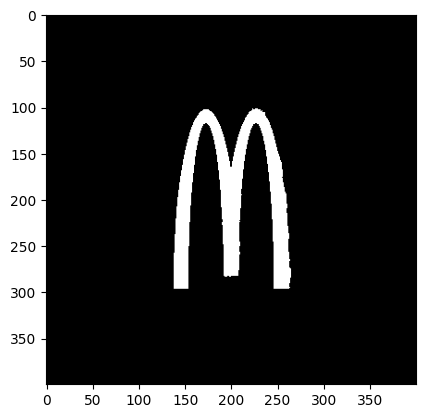

INVERSE MASK


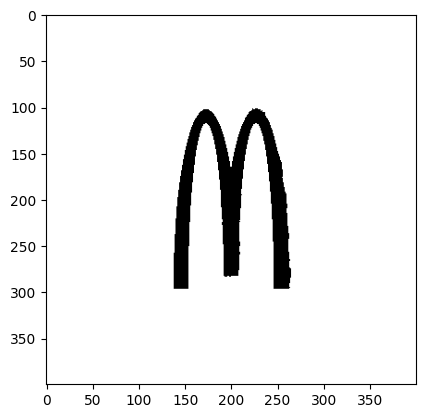

MASK ON ROI


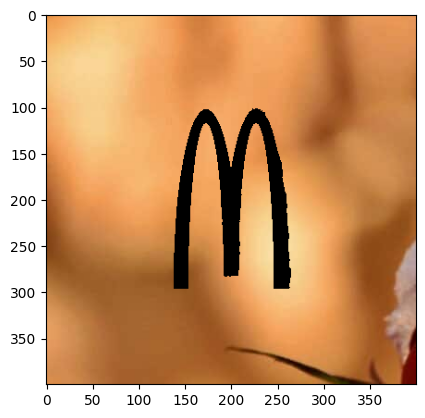

REGION FROM ORIGINAL LOGO


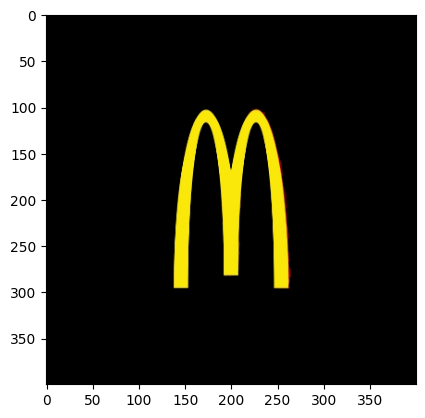

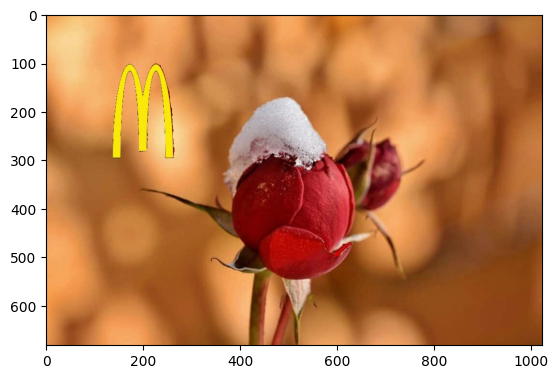

In [ ]:
# Load two images
img1 = cv.imread('../../img/1.jpg')
img2 = cv.imread('../../img/logo2.jpg')
img2 = cv.resize(img2, (400, 400))
 
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
 
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(img2gray, cv.COLOR_BGR2RGBA))
plt.show()
#change trehshold
ret, mask = cv.threshold(img2gray, 20, 255, cv.THRESH_BINARY)
print("MASK")
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGBA))
plt.show()
mask_inv = cv.bitwise_not(mask)
print("INVERSE MASK")
plt.imshow(cv.cvtColor(mask_inv, cv.COLOR_BGR2RGBA))
plt.show()
 
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
print("MASK ON ROI")
plt.imshow(cv.cvtColor(img1_bg, cv.COLOR_BGR2RGBA))
plt.show()
 
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
print("REGION FROM ORIGINAL LOGO")
plt.imshow(cv.cvtColor(img2_fg, cv.COLOR_BGR2RGBA))
plt.show()

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGBA))